In [76]:
import os
print "hey"
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline  

hey


In [77]:
directory = "../data/"
files = os.listdir(directory)
print files

['profile2.data', 'profile_N1.data', 'profile_N50.data', 'profile_N11.data', 'profile1.data', 'profile_N5.data', 'profile_N9.data', 'profile_N3.data', 'profile_N20.data', 'profile_N7.data']


In [78]:
# fname = files[0]

# fp = open(directory + fname, "r+")
# utime = []
# stime = []
# major_pf = []
# minor_pf = []

# for line in fp:
#     datas = line.strip().split(" ")
#     # datas = line
#     if len(datas) != 4 or datas[0] == 'read':
#         print datas
#         continue # continue
#     major_pf.append(int(datas[0]))
#     minor_pf.append(int(datas[1]))
#     utime.append(int(datas[2]))
#     stime.append(int(datas[3]))

# x_label = [0.05 * i for i in range(len(utime))]
# #print utime


In [79]:
# def save_helper(case, arg, tar_dir):
#     tar_dir = './'
#     sv_fname = 'case' + str(case) + ‘_’
#     if (case == 2)
    
#     savefig(fname, dpi=None, facecolor='w', edgecolor='w',
#         orientation='portrait', papertype=None, format=None,
#         transparent=False, bbox_inches=None, pad_inches=0.1,
#         frameon=None)


In [82]:
# plot x-axis = N, y axis = metrics
def paint(fn, plot_datas, mode):
    
    # print plot_datas[0]
    
    if mode == 1: # plot N - final result
        #do
        # print "shape of array", plot_datas[plot_datas.keys[0]].shape()
        
        
        x_label = plot_datas.keys() #N
        print "this is tested N: " + str(x_label)
        range_limit = 9999999999
        for i in x_label:
            range_limit = min(range_limit, len(plot_datas[i][0]))
        print "range limit %d" % range_limit
        plot_data = []
        
        data_index = range_limit - 1
        for typeindex in range(5):
            plot_data.append([plot_datas[i][typeindex][data_index] for i in x_label ])
        print plot_data
        
        plt.title("N - page fault")
        plt.plot( x_label, plot_data[0], "r+", x_label, plot_data[1], "ro")  # pg_flt - N 
        plt.xlabel("N")
        plt.ylabel("data-page fault happened at the end")
        plt.show()
        
        plt.title("N - cpu time")
        plt.plot( x_label, plot_data[2], 'g+', x_label, plot_data[3], 'go')
        plt.xlabel("N")
        plt.ylabel("cpu time")
        plt.show()
        
        plt.title("N - cpu time relation")
        plt.plot( x_label, plot_data[4], 'b+')
        plt.xlabel("N")
        plt.ylabel("cpu time ratio, utime/stime")
        plt.show()
    else:
        title1 = fn + "- time - page fault"
        title2 = fn + "- time - cput time"
        rang = len(plot_datas[0])
        print rang
        x_label = [0.05 * i for i in range(rang)]
        
        plt.title(title1)
        plt.plot( x_label, plot_datas[0], "r+", x_label, plot_datas[1], "ro")  # pg_flt
        plt.xlabel("time(s)")
        plt.ylabel("data-page fault")
        plt.show()
#         plt.savefig('case12_' + fn + '.png', bbox_inches='tight')
        
#         plt.title(title2)
#         plt.plot( x_label, plot_datas[2], 'g+', x_label, plot_datas[3], 'go')
#         plt.xlabel("times(s)")
#         plt.ylabel("cpu time")
#         plt.show()
        

exp12:   2
1005
10015
1008
exp12:   1
1006
1007
1005
1348
1006
{1: 'profile1.data', 2: 'profile2.data'} fn_exp12
1026


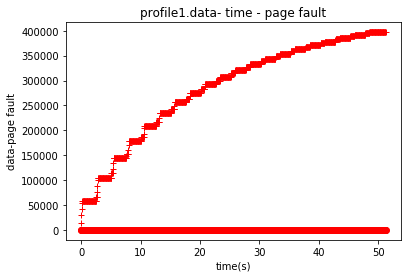

1027


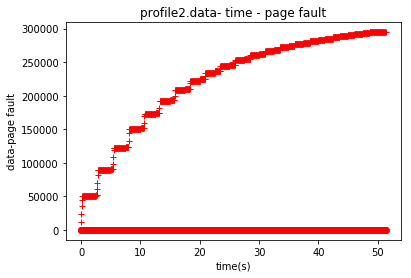

this is tested N: [1, 3, 5, 7, 9, 11, 50, 20]
range limit 1005
[[52790, 150834, 251401, 351972, 454603, 555476, 1500850, 993396], [2, 0, 0, 0, 0, 0, 11883, 51275], [6, 20, 20, 56, 69, 70, 93, 126], [23, 68, 120, 146, 160, 229, 4160, 864], [0.2608695652173913, 0.29411764705882354, 0.16666666666666666, 0.3835616438356164, 0.43125, 0.3056768558951965, 0.02235576923076923, 0.14583333333333334]]


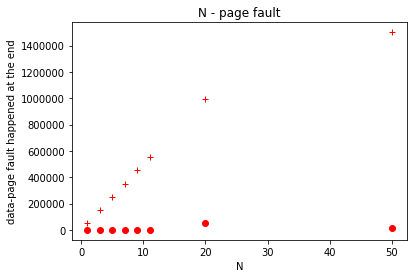

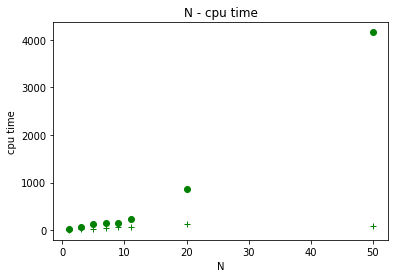

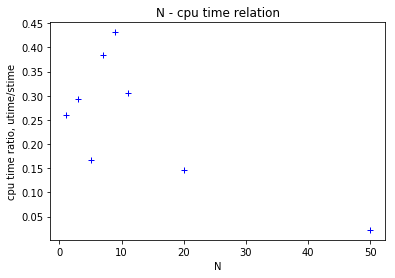

finished


In [83]:
# for N iterations: 

def readData(data, directory, fn):
    fp = open(directory + fn, "r+")
    data.append([]) # minor fault
    data.append([]) # major fault
    data.append([]) # utime
    data.append([]) # stime
    data.append([]) # efficiency
    # print data
    for line in fp:
        data_line = line.strip().split(" ")
        # datas = line
        if len(data_line) != 4 or data_line[0] == 'read' or data_line[0] == 'file':
            # print data_line
            continue # continue
        data[0].append(int(data_line[0]))
        data[1].append(int(data_line[1]))
        data[2].append(int(data_line[2]))
        data[3].append(int(data_line[3]))
        data[4].append(float (data[2][-1]) / data[3][-1])
    
    # print "data read finished for file %s, %d lines of data read in " % (fn, len(data[4]))
    fp.close()


fnames = []
datas_exp3 = {} # N related
fn_exp3 = {}
datas_exp12 = {} # experiments
fn_exp12 = {}

for f in files:
    index = f.find("N")
    if index != -1:
        s = f[index:]
        s = s.split(".")[0][1:]
        # print "N = " + s # N
        N = int(s)
        data = []
        datas_exp3[N] = data
        fn_exp3[N] = f
        readData(data, directory, f)
        print len(datas_exp3[N][0]) # test
    else:  # experiment 1 & 2
        N = int(f.split(".")[0][-1])
        print 'exp12:  ', N
        data = []
        datas_exp12[N] = data
        fn_exp12[N] = f
        readData(data, directory, f)
    
def paint_tool(exp, idx, mode):
    if exp == 3:
        if mode == 1: # print N relation
            paint(fn_exp3, datas_exp3, mode)
        else:
            paint(fn_exp3[idx], datas_exp3[idx], mode)
    else: # exp == 1
        paint(fn_exp12[idx], datas_exp12[idx], 0)

# experiment 3, N = 5
# paint_tool(3, 5, 0)

# experiment 1,2 
print fn_exp12, 'fn_exp12'
paint_tool(1, 1, 0)
paint_tool(1, 2, 0) # run the second experiment

# experiment 3, N = 3 5 111，
paint_tool(3, 0, 1)

print "finished" 

In [41]:
# plt.title(file)
# plt.plot( x_label, major_pf, "go", x_label, minor_pf, "g+")
# plt.xlabel("time")
# plt.ylabel("data-page fault")
# plt.show()
# plt.plot(x_label, utime, "ro", x_label, stime, "rx")
# plt.xlabel("time")
# plt.ylabel("data-cputime")
# plt.title(file)
# plt.show()

In [12]:
a = int('10')
b = int('20')
c = float(a)/ b
type(c)
print c 

0.5
